In [25]:
!pip install wordcloud
!pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached regex-2023.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (770 kB)


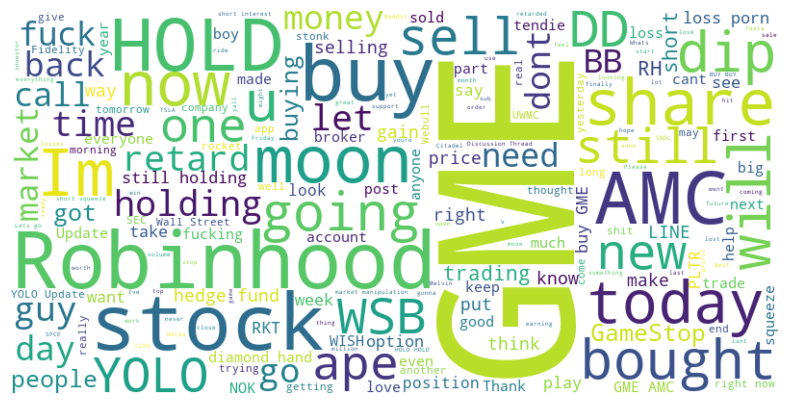

In [32]:
import os
#import numpy as np
import matplotlib.pyplot as plt
import csv
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
from nltk.corpus import stopwords
#import nltk
#nltk.download('stopwords')

import re

stopwords = set(stopwords.words('english'))
df = pd.read_csv('../data/senti_posts.zip').drop(6161)
text = df['title'].astype(str).str.cat(sep=' ')

def clean_text(text):
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    return text

cleaned_text = clean_text(text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

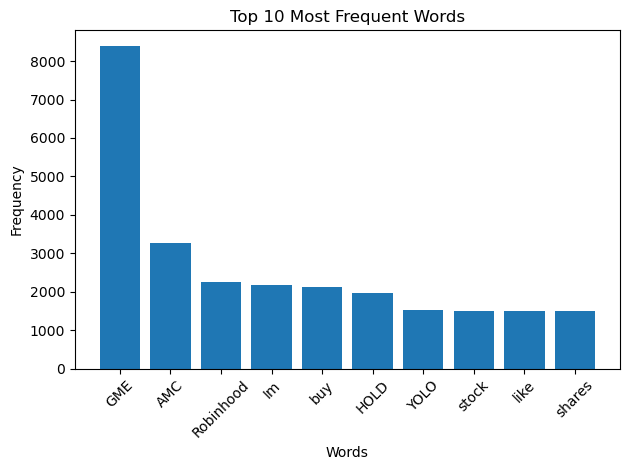

In [33]:
import os
#import numpy as np
import matplotlib.pyplot as plt
import csv
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
from nltk.corpus import stopwords
#import nltk
#nltk.download('stopwords')

import re

stopwords = set(stopwords.words('english'))
df = pd.read_csv('../data/senti_posts.zip').drop(6161)
text = df['title'].astype(str).str.cat(sep=' ')

def clean_text(text):
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    return text

cleaned_text = clean_text(text)

# Calculate word frequencies
word_frequencies = {}
words = cleaned_text.split()
for word in words:
    if word.lower() not in stopwords:
        if word in word_frequencies:
            word_frequencies[word] += 1
        else:
            word_frequencies[word] = 1

# Sort word frequencies in descending order
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Get the top N most frequent words and their frequencies
N = 10  # Change this value to show more or fewer words
top_words = [word[0] for word in sorted_word_frequencies[:N]]
top_frequencies = [word[1] for word in sorted_word_frequencies[:N]]

# Create a bar chart for the top N most frequent words
plt.bar(range(N), top_frequencies, tick_label=top_words)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(N))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()